## Model: Dense Neural Network

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
from sklearn.metrics import mean_squared_error
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow import math

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1500_sentiment_api.csv to 1500_sentiment_api.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['1500_sentiment_api.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.head()

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,has_neighborhood_overview,has_reviews,listing_url,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,property_page_links,transit_scores,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu,25*k
0,177,39.69551,-104.92489,79.0,entire home,2,0-2,1.0,1.0,1.0,Virginia Village,1,1,https://www.airbnb.com/rooms/177,1,1,615,Joe,within an hour,1.0,1.00,1.0,Virginia Village,2.0,2.0,1.0,0.0,1,15.0,6.0,1,0.0,1,Tiny Home in the Heart of the City- ECO FRIENDLY,"I'm originally from Oklahoma, but have lived i...","160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...","[""Hot water"", ""Long term stays allowed"", ""Coff...",29,400,month,long_term,1,0,120,24,0,4.85,4.96,4.89,4.97,4.94,4.85,4.78,1.56,84.0,51.0,https://www.walkscore.com/score/loc/lat=39.695...,37.0,0.6037,0.304,0.0,0.696,0.6948,0.192,0.000,0.808,0.9476,0.153,0.069,0.778,0.0000,0.000,0.000,1.000,4.0
1,360,39.76758,-105.00316,133.0,entire home,3,3-4,1.0,2.0,2.0,Highland,1,1,https://www.airbnb.com/rooms/360,1,1,666,Jennifer & Giovanni,within an hour,1.0,0.87,1.0,Highland,4.0,4.0,1.0,1.0,1,15.0,4.0,1,0.0,1,Sit in the Peaceful Garden of the Chickadee Co...,We are artists and tinkerers.\r\n \r\nWe enjoy...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,"[""Coffee maker"", ""Washer"", ""Bedroom comforts"",...",29,35,month,2_months,1,0,174,7,1,4.99,4.99,4.96,5.00,5.00,5.00,4.91,3.26,93.0,90.0,https://www.walkscore.com/score/loc/lat=39.767...,49.0,0.4939,0.242,0.0,0.758,0.9694,0.141,0.023,0.835,0.9814,0.271,0.019,0.709,0.1531,0.025,0.018,0.956,6.0
2,2361919,39.77960,-105.03859,76.0,entire home,2,0-2,1.0,1.0,1.0,Berkeley,1,1,https://www.airbnb.com/rooms/2361919,1,1,5811115,Annette,within a few hours,1.0,0.81,1.0,Berkeley,5.0,6.0,1.0,0.0,1,10.0,8.0,0,1.0,1,The Cloisters at Berkeley,"I love people of all ages and types, dogs, lon...",A private studio apartment in an unbeatable ne...,"Boutiques, bars, restaurants galore! Highlands...","[""Hot water"", ""Long term stays allowed"", ""Coff...",30,1125,month,long_term,1,0,43,3,0,4.67,4.74,4.56,4.67,4.60,4.93,4.60,0.40,76.0,81.0,https://www.walkscore.com/score/loc/lat=39.779...,34.0,0.0000,0.000,0.0,1.000,0.9769,0.278,0.000,0.722,0.9269,0.150,0.000,0.850,0.4333,0.067,0.026,0.907,4.0
3,2386289,39.76777,-105.03529,150.0,entire home,4,3-4,1.0,1.0,1.0,West Highland,1,1,https://www.airbnb.com/rooms/2386289,1,1,184771,Melanie,NaN,NaN,1.00,0.0,West Highland,1.0,2.0,1.0,1.0,1,13.0,8.0,1,4.0,1,Sunny Sky Loft in Highlands,"Things I love: dogs, urban gardening, yoga, ho...",Why stay in a stuffy old hotel room when you c...,The neighborhood where the house is located is...,"[""Hot water"", ""Long term stays allowed"", ""Coff...",7,30,week,month,1,0,95,1,0,4.91,4.87,4.89,4.96,4.97,4.93,4.83,0.94,75.0,86.0,https://www.walkscore.com/score/loc/lat=39.767...,39.0,0.4215,0.412,0.0,0.588,0.9716,0.24

In [5]:
df.isna().sum()

id                            0
latitude                      0
longitude                     0
price                         0
shared_status                 0
                             ..
neighborhood_sent_compound    0
neighborhood_sent_pos         0
neighborhood_sent_neg         0
neighborhood_sent_neu         0
25*k                          0
Length: 76, dtype: int64

#### Defining X and y

In [6]:
X = df[[
    'shared_status', 
    'accommodates',
    'bathrooms', 
    'bedrooms',
    'beds_adjusted',
    'neighborhood', 
    'has_neighborhood_overview', 
    'has_reviews',
    'instant_bookable',
    'host_lives_in_neighborhood',
     'host_is_superhost', 
    'host_has_profile_pic',
    'host_identity_verified', 
    'has_host_about', 
    'years_hosting',
    'license_listed', 
    'minimum_nights',
    'maximum_nights',
     'number_of_reviews',
     'bike_scores',
    'walk_scores',
    'host_sent_compound', 
    'description_sent_compound', 
    'neighborhood_sent_compound']]

X = pd.get_dummies(columns=[ 
                            
                            'shared_status',
                            'neighborhood'
                           ], 
                   drop_first=True, data=X)

y = df['price']


#### Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

#### Standard Scaling

In [8]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

### Basic Model

In [9]:
n_input = Z_train.shape[1]

model = Sequential()
model.add(Dense(64, input_shape=(n_input,), activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
# model.summary()


In [10]:
history = model.fit(
    Z_train,
    y_train,
    validation_data=(Z_test, y_test),
    epochs=70,
    batch_size=64)

Epoch 1/70
66/66 [==============================] - 6s 6ms/step - loss: 42751.1953 - root_mean_squared_error: 206.7636 - val_loss: 42384.4297 - val_root_mean_squared_error: 205.8748
Epoch 2/70
66/66 [==============================] - 0s 4ms/step - loss: 41097.9492 - root_mean_squared_error: 202.7263 - val_loss: 40393.1680 - val_root_mean_squared_error: 200.9805
Epoch 3/70
66/66 [==============================] - 0s 4ms/step - loss: 38574.6797 - root_mean_squared_error: 196.4044 - val_loss: 37395.8828 - val_root_mean_squared_error: 193.3801
Epoch 4/70
66/66 [==============================] - 0s 4ms/step - loss: 34992.7188 - root_mean_squared_error: 187.0634 - val_loss: 33357.5664 - val_root_mean_squared_error: 182.6405
Epoch 5/70
66/66 [==============================] - 0s 4ms/step - loss: 30509.4805 - root_mean_squared_error: 174.6696 - val_loss: 28771.7227 - val_root_mean_squared_error: 169.6223
Epoch 6/70
66/66 [==============================] - 0s 4ms/step - loss: 25628.4609 - root_

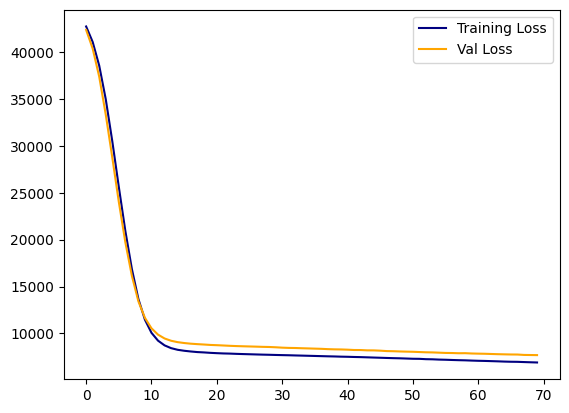

In [11]:
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='orange', label='Val Loss')
plt.legend();

In [12]:
y_pred = model.predict(Z_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

33/33 [==============================] - 0s 1ms/step
RMSE: 87.63710279309535


In [13]:
y_pred_train = model.predict(Z_train)
rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
print("Train RMSE:", rmse_train)

131/131 [==============================] - 0s 2ms/step
Train RMSE: 82.78061855844132


# Building a more involve model

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=7, verbose=1)


In [ ]:
n_input = Z_train.shape[1]

model = Sequential()
model.add(Dense(32, input_shape=(n_input,), activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    Z_train,
    y_train,
    validation_data=(Z_test, y_test),
    epochs=70,
    batch_size=128,
    callbacks=[es]
)

Epoch 1/70
33/33 [==============================] - 5s 14ms/step - loss: 42437.2812 - root_mean_squared_error: 206.0031 - val_loss: 44260.5000 - val_root_mean_squared_error: 210.3818
Epoch 2/70
33/33 [==============================] - 0s 7ms/step - loss: 39786.5391 - root_mean_squared_error: 199.4656 - val_loss: 44517.7227 - val_root_mean_squared_error: 210.9922
Epoch 3/70
33/33 [==============================] - 0s 7ms/step - loss: 36745.2227 - root_mean_squared_error: 191.6904 - val_loss: 44437.6484 - val_root_mean_squared_error: 210.8024
Epoch 4/70
33/33 [==============================] - 0s 8ms/step - loss: 33375.9531 - root_mean_squared_error: 182.6909 - val_loss: 43498.4297 - val_root_mean_squared_error: 208.5628
Epoch 5/70
33/33 [==============================] - 0s 7ms/step - loss: 30271.5176 - root_mean_squared_error: 173.9871 - val_loss: 40643.6797 - val_root_mean_squared_error: 201.6028
Epoch 6/70
33/33 [==============================] - 0s 7ms/step - loss: 26994.2168 - root

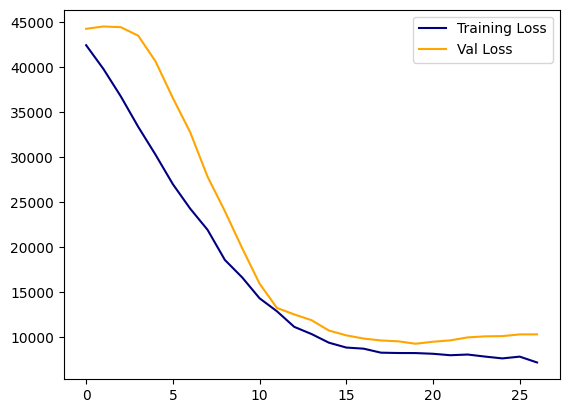

In [ ]:
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='orange', label='Val Loss')
plt.legend();

In [ ]:
y_pred = model.predict(Z_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

33/33 [==============================] - 0s 2ms/step
RMSE: 101.5229650696597


#### With a log transformation of y?

In [ ]:
X = df[[
    'shared_status', 
    'accommodates', 
    'bathrooms', 
    'bedrooms', 
    'beds_adjusted', 
    'neighborhood', 
    'city',
    'has_neighborhood_overview',
    'has_reviews',
    'host_listings_count',
    'host_is_superhost' , 
    'host_identity_verified',
    'has_host_about',
    'host_lives_in_neighborhood', 
    'years_hosting' , 
    'years_of_reviews', 
    'license_listed',
    'bike_scores', 
    'walk_scores',
    'minimum_nights',
    'maximum_nights',
    'instant_bookable',
    'number_of_reviews',
    'name_sent_pos',
    'host_sent_pos',
    'description_sent_pos',
    'neighborhood_sent_pos'
    
    
      ]]
X = pd.get_dummies(columns=[ 
                            'city',
                            'shared_status',
                            'neighborhood'
                           ], 
                   drop_first=True, data=X)

y = np.log(df['price'])

#### Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

#### Standard Scaling

In [ ]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=7, verbose=1)


In [ ]:
n_input = Z_train.shape[1]

model = Sequential()
model.add(Dense(64, input_shape=(n_input,), activation='leaky_relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
model.add(Dense(64, activation='leaky_relu'))
model.add(Dropout(0.4))
# model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

model.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    Z_train,
    y_train,
    validation_data=(Z_test, y_test),
    epochs=70,
    batch_size=128,
    callbacks=[es]
)

Epoch 1/70
33/33 [==============================] - 2s 9ms/step - loss: 18.0536 - root_mean_squared_error: 4.2490 - val_loss: 15.8736 - val_root_mean_squared_error: 3.9842
Epoch 2/70
33/33 [==============================] - 0s 5ms/step - loss: 8.7106 - root_mean_squared_error: 2.9514 - val_loss: 8.5480 - val_root_mean_squared_error: 2.9237
Epoch 3/70
33/33 [==============================] - 0s 6ms/step - loss: 4.3797 - root_mean_squared_error: 2.0928 - val_loss: 4.1430 - val_root_mean_squared_error: 2.0354
Epoch 4/70
33/33 [==============================] - 0s 5ms/step - loss: 3.0918 - root_mean_squared_error: 1.7584 - val_loss: 2.4437 - val_root_mean_squared_error: 1.5632
Epoch 5/70
33/33 [==============================] - 0s 5ms/step - loss: 2.6415 - root_mean_squared_error: 1.6253 - val_loss: 1.9796 - val_root_mean_squared_error: 1.4070
Epoch 6/70
33/33 [==============================] - 0s 5ms/step - loss: 2.1816 - root_mean_squared_error: 1.4770 - val_loss: 1.6432 - val_root_mean_

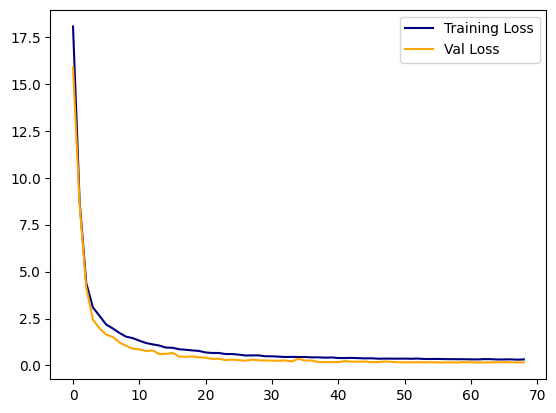

In [ ]:
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='orange', label='Val Loss')
plt.legend();

In [ ]:
y_pred_power = model.predict(Z_test)
y_preds = [math.exp(y_pred_i) for y_pred_i in y_pred_power]
y_test_regular = [math.exp(y_test_i) for y_test_i in y_test]
rmse = (mean_squared_error(y_test_regular, y_preds))**0.5
print("RMSE:", rmse)

33/33 [==============================] - 0s 2ms/step
RMSE: 101.54581112883238


# Back to simpler models

In [ ]:
#Best so far

n_input = Z_train.shape[1]

model = Sequential()
model.add(Dense(64, input_shape=(n_input,), activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))


model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
# model.summary()

history = model.fit(
    Z_train,
    y_train,
    validation_data=(Z_test, y_test),
    epochs=70,
    batch_size=64)


Epoch 1/70
66/66 [==============================] - 2s 7ms/step - loss: 43156.2070 - root_mean_squared_error: 207.7407 - val_loss: 43316.8672 - val_root_mean_squared_error: 208.1270
Epoch 2/70
66/66 [==============================] - 0s 5ms/step - loss: 42460.5430 - root_mean_squared_error: 206.0596 - val_loss: 42453.4336 - val_root_mean_squared_error: 206.0423
Epoch 3/70
66/66 [==============================] - 0s 5ms/step - loss: 41177.5781 - root_mean_squared_error: 202.9226 - val_loss: 41028.0898 - val_root_mean_squared_error: 202.5539
Epoch 4/70
66/66 [==============================] - 0s 5ms/step - loss: 39310.1680 - root_mean_squared_error: 198.2679 - val_loss: 39034.3359 - val_root_mean_squared_error: 197.5711
Epoch 5/70
66/66 [==============================] - 0s 4ms/step - loss: 37027.3984 - root_mean_squared_error: 192.4250 - val_loss: 36699.3828 - val_root_mean_squared_error: 191.5708
Epoch 6/70
66/66 [==============================] - 0s 4ms/step - loss: 34408.1797 - root_

I tested and tweaked a number of parameters for this model. In the end these were my best parameters:
- Two dense layers of 64 nodes each
- Dropout of 0.5
- Batch Normalization after ther first layer
- Batch size of 128
- 70 epochs w/ early stopping

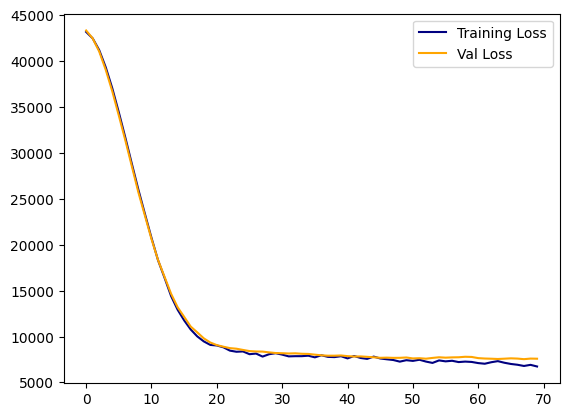

In [ ]:
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='orange', label='Val Loss')
plt.legend();

In [ ]:
y_pred = model.predict(Z_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

33/33 [==============================] - 0s 2ms/step
RMSE: 87.10056642935253
